**Image Classification using Logistic Regression**
* Use existing knowledge of PyTorch and linear regression for image classification
* MNIST Handwritten Digit Database: 28px by 28px grayscale images of handwritten digits w/ labels

In [ ]:
import torch
# contains utils for working w/ image data
# can also auto download and import popular datasets like MNIST
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# download training dataset to specified root directory
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# see info about dataset object
print(dataset)
# get size of dataset
print(len(dataset))

# this 60k image dataset is the training set

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
60000


In [ ]:
# database also has an additional test set of 10k images
# we already downloaded MNIST data, so don't need to set download=True
test_dataset = MNIST(root='data/', train=False)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test


In [ ]:
# look at sample element of training dataset
dataset[0]
# remember: for linear regression we passed in (inputs, targets) to TensorDataset
# likewise, dataset[0] gives a pair (28x28 image, label)

# image is object of class PIL.Image.Image in python imaging library Pillow
# can view image using matplotlib

(<PIL.Image.Image image mode=L size=28x28 at 0x7F508CD90D30>, 5)

In [ ]:
# matplotlib - plotting & graphing library for data science
import matplotlib.pyplot as plt

# tell jupyter to plot within notebook instead of new popup
%matplotlib inline

Label: 5


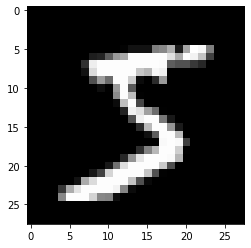

In [ ]:
image, label = dataset[0] # get first image and label from dataset
plt.imshow(image, cmap='gray') # plot image and specify grayscale
print('Label:', label)

Label: 3


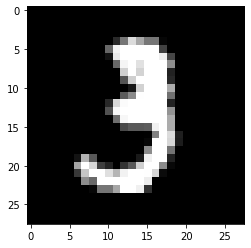

In [ ]:
# look at another item in dataset
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

PyTorch doesn't know how to work with images.
* Need to convert images into tensors
* Do this by specifying a transform when creating dataset

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# specify transform when creating dataset
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# image tensor is 1 x 28 x 28
# second and third dims represent pixels
# first dim is for color channels
# mnist images are grayscale, so only 1 color channel
# typically, color images have 3 color channels (rgb)

torch.Size([1, 28, 28]) 5


In [ ]:
# print rows and cols 10-15 of image tensor
print(img_tensor[:, 10:15, 10:15])
# print min and max values in image tensor
print(torch.max(img_tensor), torch.min(img_tensor))
# we see values range from 0 to 1 -- 0 is black, 1 is white

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


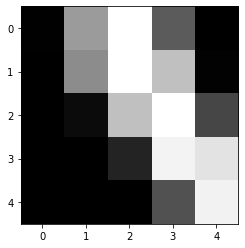

In [ ]:
# plot section of image
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')
# specify 0 for first dim to select first (and only) color channel

**Training and Validation Datasets**
* Often split dataset into 3 parts:
  1. **Training set** - used to train model (compute loss, adjust weights)
  2. **Validation set** - used to evaluate model when training, adjust hyperparameters (learning rate etc.), pick best version of model
  3. **Test set** - used to compare different models/modeling approaches & report final accuracy of model

* MNIST dataset - 60k training images, 10k test images
  * Test set standardized so different researchers can report results against same images
  * No predefined validation set - must manually split 60k into training & validation sets

In [ ]:
# important to choose random sample for creating validation set
# training data is often ordered by target labels (e.g. all 0s, then all 1s,...)

# we'll randomly set aside validation images using the random_split method
from torch.utils.data import random_split

# 50k for training, 10k for validation
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

# shuffle training set so batches are different for every epoch
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
# don't need to shuffle validation set bc not using it to adjust model
val_loader = DataLoader(val_ds, batch_size)

**Model**
* Logistic regression model is almost identical to linear regression model - weights & bias matrices, output is `pred = x @ w.t() + b`
* Use nn.Linear to create model
* nn.Linear expects each training example to be a vector (single number of input vars)
  * Each image tensor needs to be flattened into vector of size 784 (1\*28\*28)
* Output is vector of size 10 - each element is probability that image is particular label
  * Prediction = label w/ highest probability

In [ ]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0020,  0.0189,  0.0159,  ..., -0.0208,  0.0226,  0.0059],
        [ 0.0061,  0.0095, -0.0272,  ..., -0.0111,  0.0350, -0.0329],
        [ 0.0247,  0.0122,  0.0287,  ..., -0.0166,  0.0143,  0.0101],
        ...,
        [-0.0215, -0.0238,  0.0269,  ...,  0.0210, -0.0046, -0.0143],
        [-0.0050,  0.0229, -0.0208,  ...,  0.0289,  0.0162, -0.0114],
        [-0.0169, -0.0334, -0.0045,  ..., -0.0050,  0.0182, -0.0238]],
       requires_grad=True)


In [ ]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0157, -0.0140,  0.0192,  0.0184,  0.0236, -0.0004,  0.0116, -0.0187,
        -0.0346, -0.0171], requires_grad=True)


In [ ]:
# get first batch of training images and pass into model
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  # outputs = model(images)

  # ...except we can't do this bc inputs don't have right shape
  # image tensors are 1x28x28 but we need vectors of size 28*28 = 784
  # we need to flatten the image tensors
  break

tensor([2, 4, 0, 0, 7, 8, 8, 4, 7, 4, 4, 9, 8, 3, 0, 9, 6, 3, 7, 2, 9, 3, 7, 2,
        5, 3, 4, 2, 2, 2, 5, 4, 8, 1, 4, 0, 8, 4, 7, 3, 5, 2, 8, 7, 4, 5, 9, 2,
        8, 4, 3, 3, 3, 0, 9, 0, 0, 5, 9, 4, 9, 7, 3, 6, 1, 7, 3, 3, 9, 5, 1, 0,
        5, 6, 6, 8, 9, 4, 2, 9, 4, 0, 0, 2, 9, 3, 8, 5, 4, 4, 3, 1, 7, 6, 2, 7,
        9, 4, 8, 9, 1, 4, 6, 7, 5, 5, 7, 6, 0, 6, 1, 6, 1, 5, 1, 2, 0, 8, 7, 6,
        2, 2, 9, 0, 7, 6, 0, 6])
torch.Size([128, 1, 28, 28])


To include the necessary flattening of our inputs within our model, we need to define a custom model by extending the nn.Module class.

In [ ]:
class MnistModel(nn.Module): # extends nn.Module
  # constructor
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  # xb - batch of inputs
  def forward(self, xb):
    # .reshape returns tensor w/ same elements but w/ specified shape
    # batch shape is 128 x 1 x 28 x 28 (128 is batch size)
    # want to reshape to 128 x 784, so we could do:
    #   xb = xb.reshape(128, 784)
    # passing in -1 tells pytorch to infer size of that dim based on orig shape
    # this allows us to avoid hardcoding the batch size in the model
    xb = xb.reshape(-1, 784)
    # pass batch of flattened vectors into self.linear and return output
    out = self.linear(xb)
    return out

model = MnistModel()

In [ ]:
# model is no longer an nn.Linear object, so it no longer has .weight and .bias
# they are now inside model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
# model does still have .parameters() method
# returns list containing weights and biases
print(list(model.parameters()))

torch.Size([10, 784]) torch.Size([10])
[Parameter containing:
tensor([[-0.0334, -0.0070, -0.0332,  ...,  0.0231,  0.0013, -0.0110],
        [ 0.0191, -0.0132, -0.0070,  ...,  0.0018,  0.0006, -0.0088],
        [-0.0257, -0.0172, -0.0253,  ..., -0.0019, -0.0009,  0.0314],
        ...,
        [ 0.0203, -0.0353, -0.0188,  ..., -0.0253, -0.0266, -0.0222],
        [ 0.0255, -0.0050,  0.0284,  ...,  0.0209, -0.0116, -0.0197],
        [ 0.0283, -0.0333,  0.0226,  ...,  0.0307,  0.0299,  0.0203]],
       requires_grad=True), Parameter containing:
tensor([ 0.0315,  0.0006, -0.0352, -0.0234,  0.0123, -0.0268, -0.0178, -0.0027,
         0.0050, -0.0287], requires_grad=True)]


In [ ]:
# pass first batch of images into our model
for images, labels in train_loader:
  outputs = model.forward(images)
  break

print('outputs.shape : ', outputs.shape)
print('sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
sample outputs :
 tensor([[-0.0811,  0.1199,  0.1751, -0.0394,  0.4406,  0.0087, -0.1907, -0.0787,
         -0.2714, -0.1794],
        [-0.2358, -0.0058, -0.0769, -0.1733, -0.0738, -0.0344, -0.0507,  0.1223,
         -0.0493, -0.1230]])


In [ ]:
# can convert set of outputs to probabilities using softmax function
# example with first output:
exps = torch.exp(outputs[0]) # exponentiate to make nums positive
print('exps: ', exps)
probs = exps / torch.sum(exps) # divide by sum so they add up to 1
print('probs: ', probs)

exps:  tensor([0.9221, 1.1274, 1.1914, 0.9614, 1.5536, 1.0087, 0.8264, 0.9243, 0.7623,
        0.8358], grad_fn=<ExpBackward0>)
probs:  tensor([0.0912, 0.1115, 0.1178, 0.0951, 0.1536, 0.0997, 0.0817, 0.0914, 0.0754,
        0.0826], grad_fn=<DivBackward0>)


In [ ]:
# we will use softmax implementation provided within pytorch
# works well w/ multidimensional tensors
# included in torch.nn.functional package
import torch.nn.functional as F

In [ ]:
# need to specify the dimension along which softmax is applied
# dim 1 is inner dim (bc 0-based indexing) - elements are outputs for each label
# we want to apply softmax along each row, not along the entire batch
probs = F.softmax(outputs, dim=1)

# look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# add  up probabilities of first output row (should be 1)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0912, 0.1115, 0.1178, 0.0951, 0.1536, 0.0997, 0.0817, 0.0914, 0.0754,
         0.0826],
        [0.0844, 0.1062, 0.0989, 0.0898, 0.0992, 0.1032, 0.1015, 0.1207, 0.1017,
         0.0944]])
Sum:  0.9999999403953552


In [ ]:
# determine predicted label by choosing index of element w/ highest prob
# torch.max returns (largest element, index) along specified dim
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 7, 2, 7, 1, 2, 1, 9, 7, 7, 2, 7, 4, 4, 6, 9, 2, 4, 4, 7, 2, 6, 7, 1,
        4, 1, 4, 1, 2, 0, 1, 7, 7, 4, 2, 4, 4, 0, 1, 4, 4, 1, 4, 7, 4, 1, 6, 9,
        1, 1, 1, 4, 1, 6, 5, 7, 7, 1, 6, 4, 1, 1, 1, 1, 4, 4, 4, 7, 4, 1, 1, 1,
        6, 7, 8, 9, 9, 4, 1, 9, 2, 7, 1, 6, 4, 1, 1, 7, 1, 5, 7, 1, 7, 7, 4, 4,
        4, 7, 4, 7, 7, 4, 4, 4, 7, 7, 4, 7, 4, 4, 4, 7, 9, 4, 1, 4, 4, 7, 9, 2,
        2, 7, 4, 7, 4, 4, 4, 4])
tensor([0.1536, 0.1207, 0.1244, 0.1127, 0.1355, 0.1140, 0.1249, 0.1225, 0.1460,
        0.1283, 0.1235, 0.1457, 0.1521, 0.1310, 0.1168, 0.1352, 0.1455, 0.1390,
        0.1177, 0.1182, 0.1062, 0.1269, 0.1364, 0.1199, 0.1403, 0.1359, 0.1263,
        0.1413, 0.1251, 0.1140, 0.1341, 0.1323, 0.1448, 0.1267, 0.1478, 0.1438,
        0.1385, 0.1285, 0.1356, 0.1485, 0.1569, 0.1477, 0.1473, 0.1248, 0.1228,
        0.1470, 0.1230, 0.1181, 0.1198, 0.1448, 0.1240, 0.1306, 0.1346, 0.1247,
        0.1379, 0.1319, 0.1287, 0.1428, 0.1299, 0.1701, 0.1302, 0.1181, 0.1390,
       

In [ ]:
# compare with actual labels
labels
# completely different bc started w/ random weights & biases

tensor([4, 6, 0, 1, 7, 9, 5, 0, 0, 1, 2, 8, 3, 8, 0, 2, 4, 7, 7, 1, 2, 1, 0, 0,
        6, 5, 9, 3, 5, 7, 7, 3, 8, 7, 9, 8, 5, 6, 2, 9, 4, 3, 2, 3, 7, 5, 5, 4,
        6, 3, 7, 2, 3, 1, 7, 8, 6, 2, 1, 2, 4, 6, 8, 6, 7, 4, 8, 5, 2, 8, 4, 8,
        3, 1, 7, 6, 3, 2, 4, 3, 0, 0, 3, 0, 5, 7, 2, 1, 9, 0, 2, 8, 0, 1, 0, 8,
        4, 0, 8, 8, 0, 9, 7, 4, 1, 5, 9, 1, 9, 2, 7, 6, 5, 2, 3, 4, 4, 9, 9, 0,
        4, 3, 7, 1, 8, 2, 8, 6])

**Evaluation Metric and Loss Function**
* Need a way to evaluate how well model is performing
* Natural way is to find % of labels predicted correctly



In [ ]:
# calculate percentage of labels predicted correctly given output probs
def accuracy(outputs, labels):
  # we don't need to softmax outputs since it doesn't change relative order
  # i.e. if y1 > y2, then after applying softmax, y1 > y2 still holds
  _, preds = torch.max(outputs, dim=1)
  # preds == labels does element-wise comparison - stores 1 if true, 0 if false
  # so sum(preds == labels) gives total num of correct predictions
  # divide by total num of predictions made to get accuracy percentage
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# calculate accuracy of current model
accuracy(outputs, labels)

tensor(0.0781)

Accuracy is great for humans, but it can't be used as a loss function for optimizing our model using gradient descent.
* max and == are non-differentiable operations
* Doesn't take into account actual probabilities, so can't provide sufficient feedback for incremental improvements

A commonly-used loss function for classification is **cross entropy**.
* For each output row, pick predicted probability for correct label
* Take logarithm of picked probability
  * Notice: probability 1 has a log of 0, low probabilities give large negative values
* Multiply by -1 so large negative values --> large positive values
* Loss = average of cross entropy across all output rows

In [ ]:
# pytorch provides implementation of cross entropy in torch.nn.functional
# also performs softmax internally, so we can directly pass in outputs of model
loss_fn = F.cross_entropy

In [ ]:
# loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3561, grad_fn=<NllLossBackward0>)


**Training the model**

Training phase steps:
1. Generate predictions
2. Calculate loss
3. Compute gradients
4. Update weights and biases
5. Reset gradients

Validation phase steps:
1. Generate predictions
2. Calculate loss
3. Calculate metrics (accuracy etc.)
4. After all batches, calculate average validation loss & metrics

In [ ]:
class MnistModel(nn.Module):
  # constructor
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  # generate output probabilities from batch of flattened input vectors
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
  
  # makes predictions w/ batch and returns loss
  def training_step(self, batch):
    images, labels = batch
    # passes in images to model itself, which calls forward()
    # this behavior is defined inside nn.Module
    out = self(images) # generate predictions
    loss = F.cross_entropy(out, labels) # calculate loss
    return loss

  # returns validation loss & accuracy for one batch
  def validation_step(self, batch):
    images, labels = batch
    out = self(images) # generate predictions
    loss = F.cross_entropy(out, labels) # calculate loss
    acc = accuracy(out, labels) # calculate accuracy
    return {'val_loss': loss, 'val_acc': acc}

  # returns average validation loss & accuracy
  # outputs parameter is list containing loss & accuracy for each batch
  def validation_epoch_end(self, outputs):
    # get list containing loss for each validation batch
    batch_losses = [x['val_loss'] for x in outputs]
    # torch.stack concatenates sequence of tensors along single dimension
    # here we use .stack to turn list of tensors into tensor of tensors
    # then we take the average of the losses in this epoch
    epoch_loss = torch.stack(batch_losses).mean()
    # likewise, calculate average accuracy in this epoch
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  # prints epoch number, validation loss, validation accuracy
  def epoch_end(self, epoch, result):
    print(f"Epoch [{epoch}], val_loss: {result['val_loss']:.4f}, val acc: {result['val_acc']:.4f}")
  
model = MnistModel()

In [ ]:
# evaluate function to perform validation phase
def evaluate(model, val_loader):
  # for each batch in validation loader, call validation step, which returns
  # loss & accuracy in an object. these objects are combined into a list.
  outputs = [model.validation_step(batch) for batch in val_loader]
  # after all validation batches, call validation_epoch_end to calculate average
  # validation loss & accuracy
  return model.validation_epoch_end(outputs)

In [ ]:
# fit function used to train the model
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  # keep track of validation loss & accuracy after every epoch
  history = []
  # create optimizer that uses specified optimizing function - SGD by default
  optimizer = opt_func(model.parameters(), lr)

  for epoch in range(epochs):
    # training phase
    for batch in train_loader:
      loss = model.training_step(batch) # generate predictions & calculate loss
      loss.backward() # compute gradients of loss w.r.t. parameters
      optimizer.step() # update parameters using gradients
      optimizer.zero_grad() # reset gradients to zero
    
    # validation phase
    result = evaluate(model, val_loader) # evaluate model for all validation batches
    model.epoch_end(epoch, result) # print result at end of epoch
    history.append(result) # store validation loss & accuracy for this epoch
  
  return history

In [ ]:
# evaluation of model w/ random parameters
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3266661167144775, 'val_acc': 0.10423259437084198}

In [ ]:
# train model for 5 epochs and look at results
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9461, val acc: 0.6323
Epoch [1], val_loss: 1.6744, val acc: 0.7381
Epoch [2], val_loss: 1.4728, val acc: 0.7668
Epoch [3], val_loss: 1.3213, val acc: 0.7849
Epoch [4], val_loss: 1.2051, val acc: 0.7981


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1140, val acc: 0.8068
Epoch [1], val_loss: 1.0410, val acc: 0.8127
Epoch [2], val_loss: 0.9814, val acc: 0.8190
Epoch [3], val_loss: 0.9319, val acc: 0.8227
Epoch [4], val_loss: 0.8901, val acc: 0.8278


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8543, val acc: 0.8320
Epoch [1], val_loss: 0.8233, val acc: 0.8357
Epoch [2], val_loss: 0.7962, val acc: 0.8386
Epoch [3], val_loss: 0.7722, val acc: 0.8410
Epoch [4], val_loss: 0.7509, val acc: 0.8436


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7318, val acc: 0.8457
Epoch [1], val_loss: 0.7145, val acc: 0.8480
Epoch [2], val_loss: 0.6989, val acc: 0.8491
Epoch [3], val_loss: 0.6846, val acc: 0.8514
Epoch [4], val_loss: 0.6715, val acc: 0.8527


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

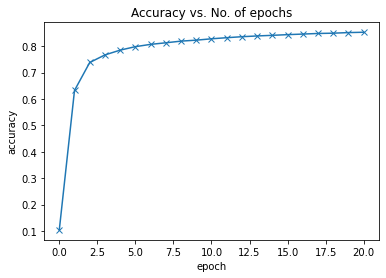

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

**Testing with individual images**

In [ ]:
# define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

In [ ]:
# predict_image function returns predicted label for single image tensor
def predict_image(img, model):
  # MnistModel takes in a batch, not a single image
  # use .unsqueeze to add a single outer dimension - now batch of 1 image
  xb = img.unsqueeze(0)
  # generate prediction (remember: nn.Module automatically invokes forward())
  yb = model(xb)
  # yb is set of probabilities - want index of max prob
  _, preds = torch.max(yb, dim=1)
  # preds contains max index for every batch - want it for first (and only) batch
  return preds[0].item()

Label: 7, Predicted: 7


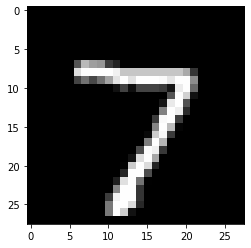

In [ ]:
img, label = test_dataset[0]
# img is a tensor, index 0 selects first (and only) color channel bc grayscale
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 4, Predicted: 4


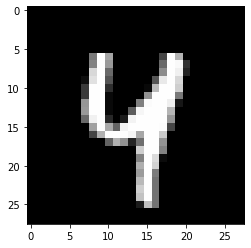

In [ ]:
img, label = test_dataset[42]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 9, Predicted: 9


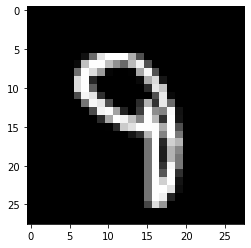

In [ ]:
# this is a tough one...
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 2, Predicted: 8


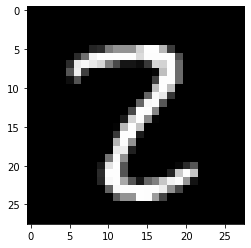

In [ ]:
# another tough one...
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

**Overall loss and accuracy of model on test set**

In [ ]:
# look at overall loss & accuracy of model on the test set
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
print(result)
# we expect this to be similar to loss & accuracy on validation set
# if not, might need better validation set w/ similar data & distribution as test set

{'val_loss': 0.640568733215332, 'val_acc': 0.860156238079071}


**Saving and loading the model**

In [ ]:
# .state_dict returns OrderedDict containing all weights & bias matrices
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0195, -0.0134, -0.0347,  ..., -0.0266,  0.0289, -0.0127],
                      [-0.0231, -0.0032,  0.0272,  ..., -0.0131, -0.0241,  0.0013],
                      [-0.0010,  0.0286, -0.0201,  ..., -0.0268,  0.0034, -0.0313],
                      ...,
                      [-0.0169, -0.0120, -0.0161,  ...,  0.0020, -0.0100, -0.0270],
                      [-0.0136, -0.0294,  0.0049,  ...,  0.0281,  0.0120,  0.0257],
                      [-0.0226, -0.0304,  0.0284,  ..., -0.0340,  0.0018, -0.0120]])),
             ('linear.bias',
              tensor([-0.0306,  0.1125, -0.0178, -0.0265,  0.0266,  0.0558,  0.0163,  0.0460,
                      -0.1181,  0.0201]))])

In [ ]:
# save weights & bias matrices to disk so we can reuse model later
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
# load weights by instantiating MnistModel class and using .load_state_dict
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
print(model2.state_dict())

OrderedDict([('linear.weight', tensor([[-0.0195, -0.0134, -0.0347,  ..., -0.0266,  0.0289, -0.0127],
        [-0.0231, -0.0032,  0.0272,  ..., -0.0131, -0.0241,  0.0013],
        [-0.0010,  0.0286, -0.0201,  ..., -0.0268,  0.0034, -0.0313],
        ...,
        [-0.0169, -0.0120, -0.0161,  ...,  0.0020, -0.0100, -0.0270],
        [-0.0136, -0.0294,  0.0049,  ...,  0.0281,  0.0120,  0.0257],
        [-0.0226, -0.0304,  0.0284,  ..., -0.0340,  0.0018, -0.0120]])), ('linear.bias', tensor([-0.0306,  0.1125, -0.0178, -0.0265,  0.0266,  0.0558,  0.0163,  0.0460,
        -0.1181,  0.0201]))])


In [ ]:
# sanity check: verify this model has same loss & accuracy on test set as before
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.640568733215332, 'val_acc': 0.860156238079071}